# Problemas de prueba de hipótesis

## Ejercicio 1

Usted es un nutricionista que investiga dos tipos diferentes de dietas para ver si existe una diferencia significativa en la pérdida de peso después de un mes. Eliges dos grupos aleatorios de personas; un grupo sigue la primera dieta y el otro sigue la segunda. Al final del mes, se registra la pérdida de peso (en kg) de cada persona:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

Con estos datos se busca responder a la siguiente pregunta: ¿Existe una diferencia significativa en la pérdida de peso promedio entre las personas que siguieron la primera dieta y las que siguieron la segunda dieta?

Para sacar conclusiones, siga los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba para comprobar la hipótesis. Puede utilizar la prueba t de Student.
-Analizar las conclusiones.

In [33]:
## Enunciar la hipótisis
import numpy as np
import scipy.stats as stats

H0 = "No hay diferencia de pérdida de peso significativa entre los dos grupos"
H1 = "Hay diferencia de pérdida de peso significativa entre los dos grupos"

Diet1 = np.array([2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5])
Diet2 = np.array([3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2])

# Medias
mean1 = np.mean(Diet1)
mean2 = np.mean(Diet2)

print(f"Media Dieta 1: {mean1:.2f} kg")
print(f"Media Dieta 2: {mean2:.2f} kg")


Media Dieta 1: 2.54 kg
Media Dieta 2: 3.03 kg


In [34]:
t_stat, p_value = stats.ttest_ind(Diet1, Diet2)
print(f"Estadístico t = {t_stat:.4f}") # Mostrar como valor decimal(4)
print(f"p-valor = {p_value:.4f}")

alpha = 0.05

if p_value < 0.05:
    print(H1)
else:
    print(H0)

Estadístico t = -3.5383
p-valor = 0.0041
Hay diferencia de pérdida de peso significativa entre los dos grupos


###  El grupo de Dieta 2 perdió 3.03 kg y el grupo de Dieta 1, 2.69 kg.
### El p-valor (aprox. 0.0041) es menor que 0.05, por lo que rechazamos la hipótesis nula (No hay diferencia de pérdida de peso significativa entre los dos grupo) y aceptamos la hipótesis alternativa (Hay diferencia de pérdida de peso significativa entre los dos grupos).

## ANOVA

**ANOVA** (*Analysis of Variance - Análisis de variación*) Es una técnica estadística utilizada para comparar las medidas de dos o más grupos. La idea detrás de ANOVA es descomponer la variabilidad total de los datos en dos componentes: variabilidad entre grupos y variabilidad dentro de los grupos:

- **Variabilidad entre grupos**: Esta variabilidad se refiere a las diferencias entre las medias del grupo. Si esta variabilidad es considerablemente mayor que la variabilidad dentro del grupo, podría ser una indicación de que al menos una de las medias del grupo es diferente.
- **Variabilidad dentro del grupo**: Esta variabilidad se refiere a la dispersión de los datos dentro de cada grupo. Si todos los grupos tienen una variabilidad similar, entonces cualquier diferencia notable en las medias de los grupos podría considerarse significativa.

Las hipótesis en ANOVA suelen incluir:

- **Hipótesis nula** ($H₀$): Las medias de todos los grupos son iguales.
- **Hipótesis alternativa** ($H₁$): Al menos una de las medias del grupo es diferente.

Si el resultado de la prueba ANOVA es significativo (por ejemplo, un valor p inferior a un umbral como 0,05), esto sugiere que al menos la media de un grupo es diferente.

## Ejercicio 2

Un agricultor decide probar tres tipos diferentes de fertilizantes para determinar si alguno es superior en términos de producción de maíz. El agricultor planta maíz en 15 parcelas idénticas y utiliza los tres fertilizantes (5 parcelas para cada tipo). Al final de la temporada mide el rendimiento de maíz (en kg) de cada parcela, con el siguiente resultado:

| Fertilizante 1 | Fertilizante 2 | Fertilizante 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

Con estos datos busca responder la siguiente pregunta: ¿Existe una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes?

Para ayudarte, sigue los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba ANOVA.
-Analizar las conclusiones.
-Si un fertilizante es mejor que otro, ¿cómo podemos saberlo?

f_stat = 20.3158
p_value = 0.0001
Al menos uno de los fertilizantes tiene un rendimiento promedio diferente
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    F1     F2      1.8 0.0099 0.4572 3.1428   True
    F1     F3      3.2 0.0001 1.8572 4.5428   True
    F2     F3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------


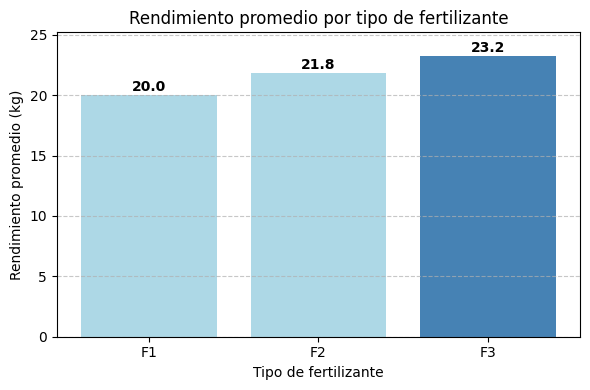

In [35]:
import scipy.stats as stats
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

H0 = "No hay diferencias en los rendimientos promedio de los tres fertilizantes"
H1 = "Al menos uno de los fertilizantes tiene un rendimiento promedio diferente"

# Datos
fert1 = [20, 21, 20, 19, 20]
fert2 = [22, 21, 23, 22, 21]
fert3 = [24, 23, 22, 23, 24]

f_stat, p_value = stats.f_oneway(fert1, fert2, fert3)

print(f"f_stat = {f_stat:.4f}")
print(f"p_value = {p_value:.4f}")

if p_value < 0.05:
    print(H1)
else:
    print(H0)


# Convertir a DataFrame
data = pd.DataFrame({
    'rendimiento': fert1 + fert2 + fert3,
    'fertilizante': ['F1']*5 + ['F2']*5 + ['F3']*5
})

# Prueba Tukey HSD
tukey = pairwise_tukeyhsd(data['rendimiento'], data['fertilizante'], alpha=0.05)
print(tukey)

#Graficar resultados

data = [fert1, fert2, fert3]
labels = ['F1', 'F2', 'F3']

means = [np.mean(fert1), np.mean(fert2), np.mean(fert3)]
labels = ['F1', 'F2', 'F3']

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, means, color=['lightblue', 'lightblue', 'steelblue'])

# Añadir los valores encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{height:.1f}',
             ha='center', va='bottom', fontweight='bold')

plt.title('Rendimiento promedio por tipo de fertilizante')
plt.xlabel('Tipo de fertilizante')
plt.ylabel('Rendimiento promedio (kg)')
plt.ylim(0, max(means) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### la prueba ANOVA marca un favor f muy alto y un valor p muy bajo
### 0.0001 < 0.05 así que rechazamos la hipótesis nula (H0). El fertilizante nº 3 es el de mayor rendimiento.